# Basics of Logistic Regression

### Example: SAT and Admittance

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [12]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [4]:
y = data['Admitted']
x1 = data['SAT']

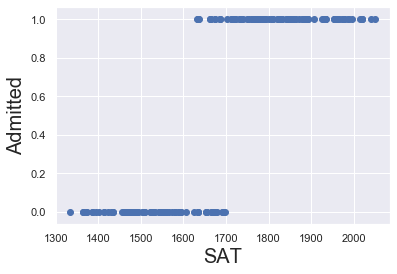

In [5]:
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

## Plot with a regression line

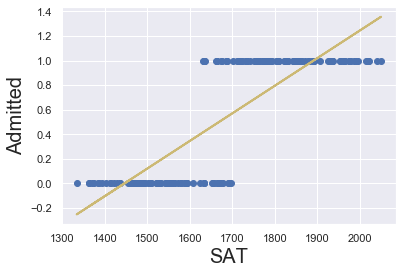

In [8]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1, y, color='C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1, y_hat, lw=2, color='C8')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Linear regression is not fit for this kind of analysis.

Our data is **non-linear**, thus, we must use **non-linear approaches**.

## Plot with a logistic regression curve

In [11]:
reg_log = sm.Logit(y,x) # dependent variable and independent variable
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 Jan 2020   Pseudo R-squ.:                  0.7992
Time:                        10:20:57   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Interpretation of the table

### MLE

**Likelifood function**: a function which estimates how likely it is that the model at hand describes the real underlying relationship of the variables.(**The bigger the likelifood function, the higher the probability that our model is correct**)

**MLE** tries to **maximize** the likelifood function.

**Log-Likelifood**: the value is almost but not always **negative**. The **bigger** it is, the **better**.

**LL-Null:** the log-likelifood of a model which has no independent variables.

Useful to compare the **log-likelihood** of my model with the **LL-null** to see if my model has any explanatory power.

**LLR(log likelihood ratio):** measures if our model is statistically different from LL-null, a.k.a a **useless model**.

In this example, **LLR p-value** is very close to **0**, so our model is sigificant

**Pseudo R-squ.**: A **good** Pseudo R-squared is somewhere **between 0.2 and 0.4**.

Useful for **comparing variations of the same model**. Different models will have completely different and incomplete Pseudo R-squares.

### $\Delta$odds = $e^{b_k}$ :  $b_k$ -coefficients

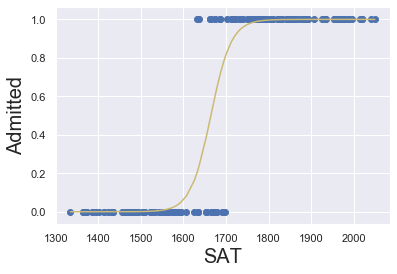

In [13]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted, f_sorted, color='C8')
plt.show()

### Interpretation

When the SAT score is relatively **LOW**, the Prob of getting admitted is **0**.

If you score around 1650, there is around 50% chance to get admitted.